# Thoracic Surgery


## Preprocessing

Download dataset

In [ ]:
!mkdir dataset
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/ThoraricSurgery.csv -P dataset -nc

mkdir: cannot create directory ‘dataset’: File exists
File ‘dataset/ThoraricSurgery.csv’ already there; not retrieving.



In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:

DATASET_PATH = Path('.') / 'dataset' / 'ThoraricSurgery.csv'


def load_dataset():
    df = pd.read_csv(DATASET_PATH)
    df = df.drop('id', 1)
    return df


In [ ]:
pd.set_option('display.max_colwidth', 5000)
df = load_dataset()

# Rename the columns to more understanble names
col_names = {'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance',
              'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough',
              'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus',
              'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma',
              'AGE': 'Age', 'Risk1Yr': 'Death_1yr'}

df = df.rename(index=str, columns=col_names)
print(df.head())
print(f"Total number of instances: {len(df)}")

df.head()

# Check that there are no null values
null_values = df.isnull().sum()

print("The number of missing values for each column is: ")
print(null_values)
print()

if null_values[1].sum() == 0:
    print("There are no missing values")
else:
    print("There are missing values")

  Diagnosis   FVC  FEV1 Performance Pain  ... PAD Smoking Asthma Age Death_1yr
0      DGN2  2.88  2.16        PRZ1    F  ...   F       T      F  60         F
1      DGN3  3.40  1.88        PRZ0    F  ...   F       T      F  51         F
2      DGN3  2.76  2.08        PRZ1    F  ...   F       T      F  59         F
3      DGN3  3.68  3.04        PRZ0    F  ...   F       F      F  54         F
4      DGN3  2.44  0.96        PRZ2    F  ...   F       T      F  73         T

[5 rows x 17 columns]
Total number of instances: 470
The number of missing values for each column is: 
Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

There are no miss

In [ ]:
def map_boolean_to_real(df, columns):
    x = (df[columns] == 'T').astype(int)
    df[columns] = x
    return df


In [ ]:
df = map_boolean_to_real(df, [
                              'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough',
                              'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD',
                              'Smoking', 'Asthma', 'Death_1yr'
                              ])
print("MAPPING BOOLEAN TO REAL:")
print(df.head(5))
print()

df_normalize = df.copy(deep=True)
for col in ["FEV1", "FVC", "Age"]:
  df_normalize[col] = (df_normalize[col] - df_normalize[col].min()) / (df_normalize[col].max() - df_normalize[col].min())

print("NORMALIZED DF:")
print(df_normalize.head(5))
print()

x_labels = list(df.keys()[0:-1])
y_label = df.keys()[-1]

data = df_normalize.drop("Death_1yr", inplace=False, axis=1).values
labels = df_normalize["Death_1yr"].values

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)

train_df = pd.DataFrame(x_train, columns=x_labels)
train_df[y_label] = y_train

test_df = pd.DataFrame(x_test, columns=x_labels)
test_df[y_label] = y_test

train_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_with_outliers_normalized_train.csv')
test_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_with_outliers_normalized_test.csv')


MAPPING BOOLEAN TO REAL:
  Diagnosis   FVC  FEV1 Performance  Pain  ...  PAD  Smoking  Asthma  Age Death_1yr
0      DGN2  2.88  2.16        PRZ1     0  ...    0        0       0   60         0
1      DGN3  3.40  1.88        PRZ0     0  ...    0        0       0   51         0
2      DGN3  2.76  2.08        PRZ1     0  ...    0        0       0   59         0
3      DGN3  3.68  3.04        PRZ0     0  ...    0        0       0   54         0
4      DGN3  2.44  0.96        PRZ2     0  ...    0        0       0   73         0

[5 rows x 17 columns]

NORMALIZED DF:
  Diagnosis       FVC      FEV1  ... Asthma       Age  Death_1yr
0      DGN2  0.296296  0.014061  ...      0  0.590909          0
1      DGN3  0.403292  0.010780  ...      0  0.454545          0
2      DGN3  0.271605  0.013124  ...      0  0.575758          0
3      DGN3  0.460905  0.024373  ...      0  0.500000          0
4      DGN3  0.205761  0.000000  ...      0  0.787879          0

[5 rows x 17 columns]



Scatter plot the three continuous attributes "FVC", "FEV1" and "Age"

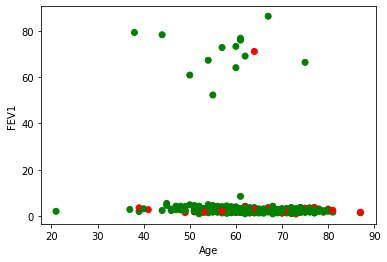

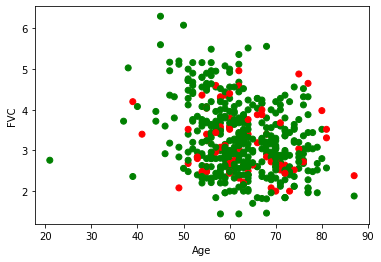

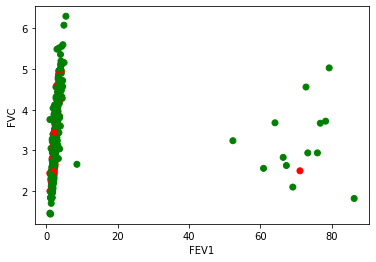

In [ ]:
colors = ["red" if label == True else "green" for label in df["Death_1yr"]]
plt.scatter(df.Age, df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(df.Age, df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(df.FEV1, df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

In [ ]:
# from sklearn.svm import OneClassSVM

# svm_clf = OneClassSVM(kernel='sigmoid', gamma='auto').fit(df.FVC.values.reshape(-1, 1))
# y_pred =svm_clf.predict(df.FVC.values.reshape(-1, 1))

# print(y_pred)

In [ ]:
print("Removing {} outliers".format((df['FEV1'] >= 7).sum()))

df = df[df['FEV1'] < 7] # TODO: use outlier detection to remove the hardcoded value

print(f"New total number of instances: {len(df)}")

Removing 15 outliers
New total number of instances: 455


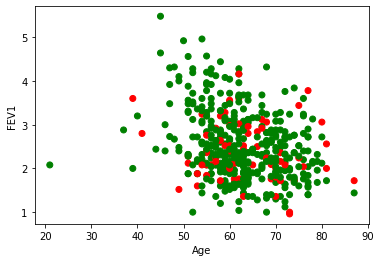

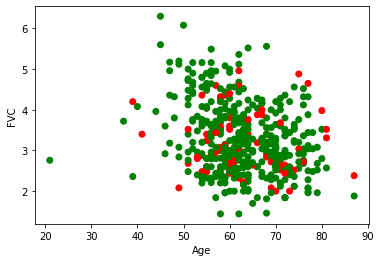

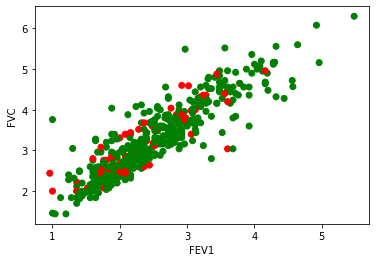

In [ ]:
colors = ["red" if label == True else "green" for label in df["Death_1yr"]]
plt.scatter(df.Age, df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(df.Age, df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(df.FEV1, df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

In [ ]:
SAVE_PATH = Path('.') / 'dataset' / 'CleanThoracicSurgery.csv'

df.to_csv(SAVE_PATH, index=False)